<a href="https://colab.research.google.com/github/VictorL85/Consumo-de-Energia/blob/main/Energia_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
est = pd.read_csv('/content/estado_regiao.csv', sep=';', encoding='latin1')
cons = pd.read_csv('/content/consumo_energia_eletrica.csv', sep=',', encoding='latin1')

In [ ]:
est.head(2)

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil


In [ ]:
cons.head(2)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451


In [ ]:
est.isna().sum()

,0
id_estado,0
sigla,0
estado,0
regiao,0
pais,0


In [ ]:
cons = cons.drop_duplicates()
est = est.drop_duplicates()

In [ ]:
est.duplicated().sum()

0

In [ ]:
cons_est = pd.merge(left=cons, right=est, left_on='sigla_uf', right_on='sigla', how='inner')
cons_est.head(2)


,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,sigla,estado,regiao,pais
0,2004,1,TO,Total,NaN,65876,27,TO,Tocantins,Norte,Brasil
1,2004,1,BA,Total,NaN,1444451,5,BA,Bahia,Nordeste,Brasil


In [ ]:
cons_est.isna().sum()

,0
ano,0
mes,0
sigla_uf,0
tipo_consumo,0
numero_consumidores,0
consumo,0
id_estado,0
sigla,0
estado,0
regiao,0


In [ ]:
cons_est.describe()

,ano,mes,numero_consumidores,consumo,id_estado
count,38880.000000,38880.000000,3.888000e+04,3.888000e+04,38880.000000
mean,2013.500000,6.500000,5.055124e+05,6.117320e+05,14.000000
std,5.766355,3.452097,1.524466e+06,1.208067e+06,7.788981
min,2004.000000,1.000000,5.200000e+01,3.540000e+02,1.000000
25%,2008.750000,3.750000,3.181800e+04,8.547600e+04,7.000000
50%,2013.500000,6.500000,9.486500e+04,2.210620e+05,14.000000
75%,2018.250000,9.250000,3.390390e+05,5.966990e+05,21.000000
max,2023.000000,12.000000,1.920126e+07,1.280974e+07,27.000000


In [ ]:
norte = cons_est.loc[cons_est['regiao'] == 'Norte']
nordeste = cons_est.loc[cons_est['regiao'] == 'Nordeste']
sul = cons_est.loc[cons_est['regiao'] == 'Sul']
sudeste = cons_est.loc[cons_est['regiao'] == 'Sudeste']
centro = cons_est.loc[cons_est['regiao'] == 'Centro-Oeste']

In [ ]:
m_nort = norte['numero_consumidores'].std()
m_norde = nordeste['numero_consumidores'].std()
m_sud = sul['numero_consumidores'].std()
m_sudeste = sudeste['numero_consumidores'].std()
m_centro = centro['numero_consumidores'].std()

In [ ]:
cons_est.loc[cons_est['regiao'] == 'Norte'] = cons_est.loc[cons_est['regiao'] == 'Norte'].fillna(m_nort)
cons_est.loc[cons_est['regiao'] == 'Nordeste'] = cons_est.loc[cons_est['regiao'] == 'Nordeste'].fillna(m_norde)
cons_est.loc[cons_est['regiao'] == 'Sul'] = cons_est.loc[cons_est['regiao'] == 'Sul'].fillna(m_sud)
cons_est.loc[cons_est['regiao'] == 'Sudeste'] = cons_est.loc[cons_est['regiao'] == 'Sudeste'].fillna(m_sudeste)
cons_est.loc[cons_est['regiao'] == 'Centro-Oeste'] = cons_est.loc[cons_est['regiao'] == 'Centro-Oeste'].fillna(m_centro)


In [ ]:
norte = cons_est.loc[cons_est['regiao'] == 'Norte']
nordeste = cons_est.loc[cons_est['regiao'] == 'Nordeste']
sul = cons_est.loc[cons_est['regiao'] == 'Sul']
sudeste = cons_est.loc[cons_est['regiao'] == 'Sudeste']
centro = cons_est.loc[cons_est['regiao'] == 'Centro-Oeste']

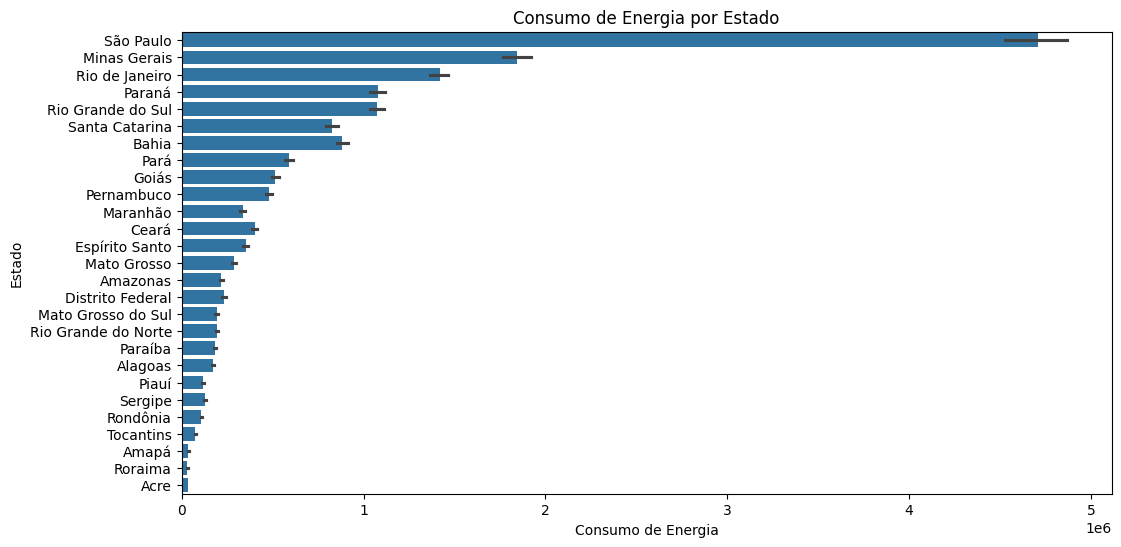

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='consumo', y='estado', data=cons_est.sort_values(by='consumo', ascending=False))
plt.title('Consumo de Energia por Estado')
plt.xlabel('Consumo de Energia')
plt.ylabel('Estado')
plt.show()


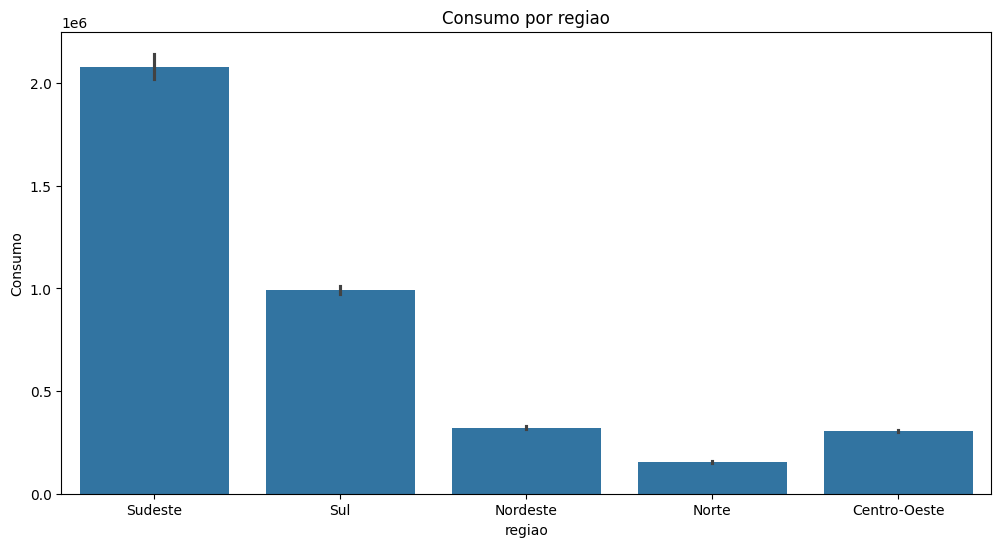

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='regiao', y='consumo', data=cons_est.sort_values(by='consumo', ascending=False))
plt.title('Consumo por regiao')
plt.xlabel('regiao')
plt.ylabel('Consumo')
plt.show()

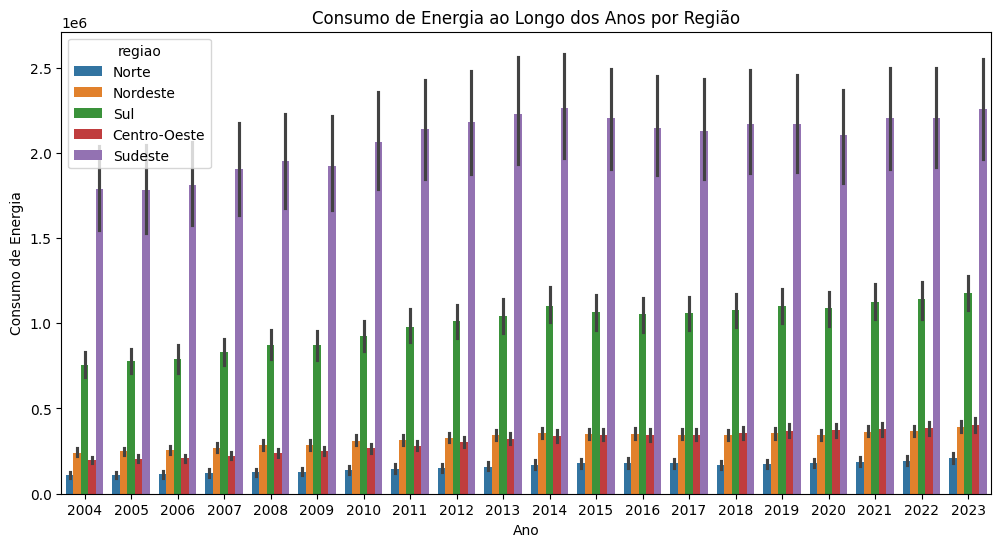

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ano', y='consumo', data=cons_est, hue='regiao')
plt.title('Consumo de Energia ao Longo dos Anos por Região')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia')
plt.show()


In [ ]:
def gra_consumo(DataFrame):
  regiao = DataFrame.iloc[0,9]
  plt.figure(figsize=(12, 6))
  sns.barplot(y='consumo', x='estado', data=DataFrame.sort_values(by='consumo', ascending=False))
  plt.title(f'Consumo de Energia por Estado da região {regiao}')
  plt.xlabel('Estado')
  plt.ylabel('Consumo de Energia')
  plt.show()


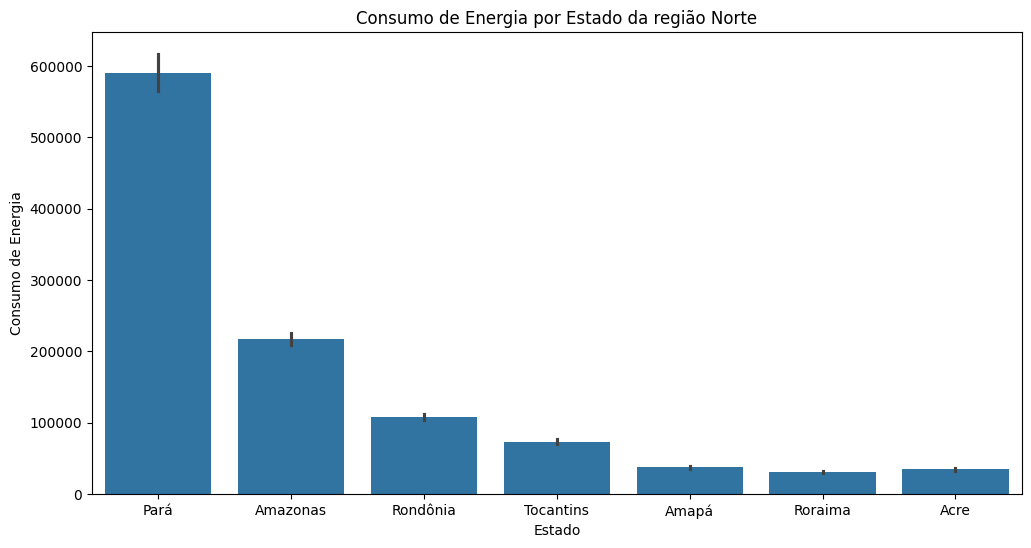

In [ ]:
gra_consumo(norte)

In [ ]:
def consumo(DataFrame):
  grupo = DataFrame.groupby('estado')['consumo'].sum().reset_index()
  grupo['porcentagem'] = round((grupo['consumo'] / grupo['consumo'].sum()) * 100,2)
  grupo.sort_values(by='porcentagem', ascending=False)
  return grupo

In [ ]:
consumo(sudeste)

,estado,consumo,porcentagem
0,Espírito Santo,506339012,4.23
1,Minas Gerais,2653727642,22.15
2,Rio de Janeiro,2042314069,17.05
3,São Paulo,6779299152,56.58


In [ ]:
grupo = cons_est.groupby('regiao')['consumo'].sum().reset_index()
grupo['porcentagem'] = round((grupo['consumo'] / grupo['consumo'].sum()) * 100,2)
grupo.sort_values(by='porcentagem', ascending=False)

,regiao,consumo,porcentagem
3,Sudeste,11981679875,50.38
4,Sul,4288301290,18.03
1,Nordeste,4175056812,17.55
0,Centro-Oeste,1764921768,7.42
2,Norte,1574180675,6.62


In [ ]:
def tipo_consumo(DataFrame):
  DataFrame = DataFrame[DataFrame['tipo_consumo'] != 'Total']
  gru_S = DataFrame.groupby('tipo_consumo')['consumo'].sum().reset_index()
  gru_S['porcentagem'] = round((gru_S['consumo'] / gru_S['consumo'].sum()) * 100,2)
  gru_S.sort_values(by='porcentagem', ascending=False)
  return gru_S

In [ ]:
tipo_consumo(norte)

,tipo_consumo,consumo,porcentagem
0,Cativo,380884968,38.96
1,Comercial,83498242,8.54
2,Industrial,277518292,28.39
3,Outros,81475835,8.33
4,Residencial,154155020,15.77


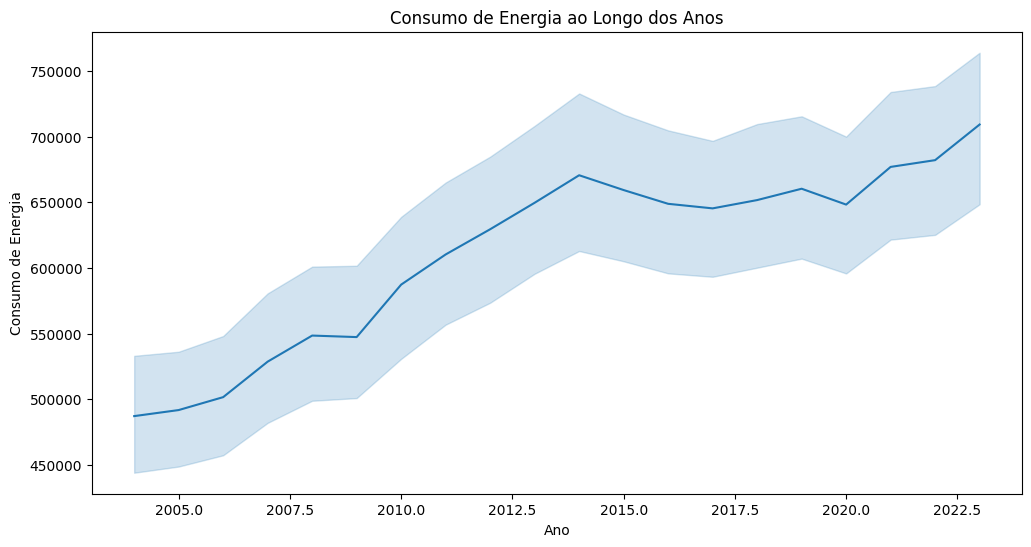

In [ ]:
# prompt: um grafico de linhas em cons_est entre o ano e consumo

plt.figure(figsize=(12, 6))
sns.lineplot(x='ano', y='consumo', data=cons_est)
plt.title('Consumo de Energia ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


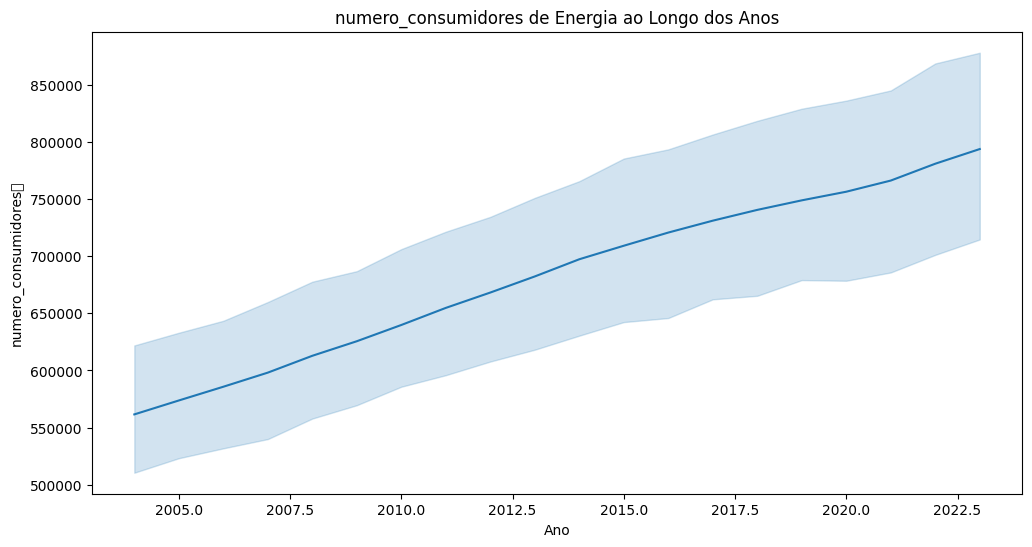

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='ano', y='numero_consumidores', data=cons_est)
plt.title('numero_consumidores de Energia ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('numero_consumidores	')
plt.show()


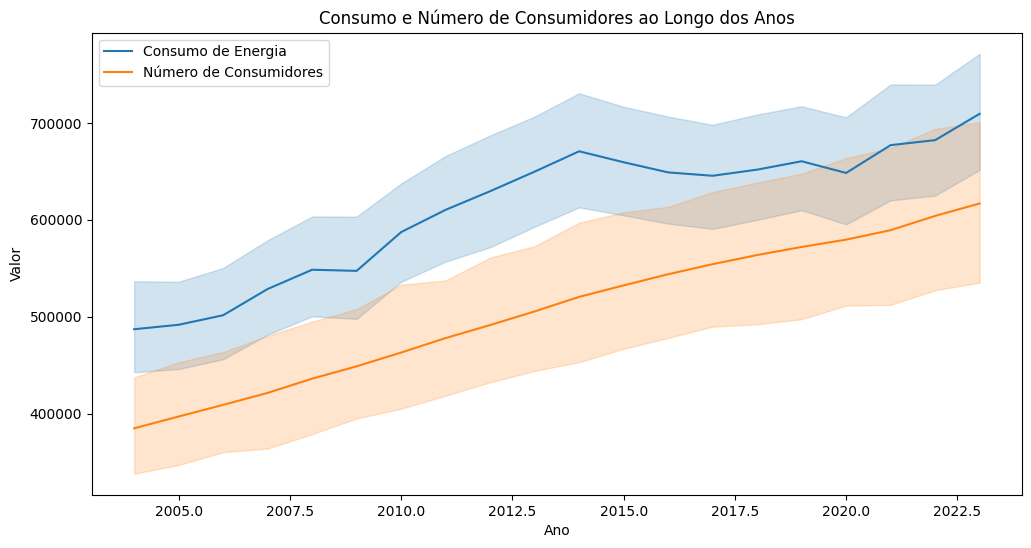

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='ano', y='consumo', data=cons_est, label='Consumo de Energia')
sns.lineplot(x='ano', y='numero_consumidores', data=cons_est, label='Número de Consumidores')
plt.title('Consumo e Número de Consumidores ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [ ]:
grupo2 = cons_est.groupby('regiao')['numero_consumidores'].sum().reset_index()
grupo2['porcentagem'] = (grupo2['numero_consumidores'] / grupo2['numero_consumidores'].sum()) * 100
grupo2.sort_values(by='porcentagem', ascending=False)

,regiao,numero_consumidores,porcentagem
3,Sudeste,1.196801e+10,45.114698
1,Nordeste,6.898117e+09,26.003201
4,Sul,4.014274e+09,15.132240
0,Centro-Oeste,2.038585e+09,7.684668
2,Norte,1.608972e+09,6.065193


A correlação entre 'numero_consumidores' e 'consumo' é: 0.9831513053935025
A relação é forte.


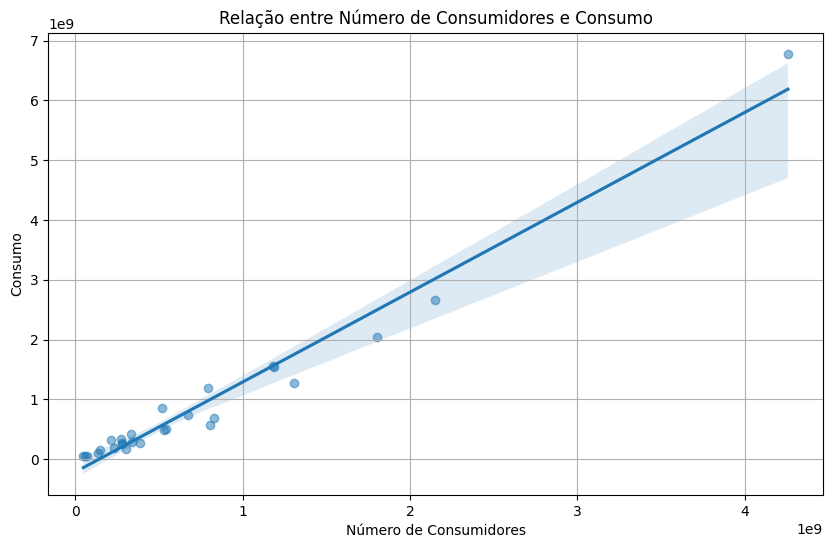

In [ ]:
grupo3 = cons_est.groupby('estado')[['numero_consumidores','consumo']].sum()
correlation = grupo3['numero_consumidores'].corr(grupo3['consumo'])
print(f"A correlação entre 'numero_consumidores' e 'consumo' é: {correlation}")

if abs(correlation) > 0.7:
  print("A relação é forte.")
elif abs(correlation) > 0.3:
  print("A relação é moderada.")
else:
  print("A relação é fraca.")
plt.figure(figsize=(10, 6))
sns.regplot(x='numero_consumidores', y='consumo', data=grupo3, scatter_kws={'alpha':0.5}) # Added transparency to scatter points
plt.xlabel('Número de Consumidores')
plt.ylabel('Consumo')
plt.title('Relação entre Número de Consumidores e Consumo')
plt.grid(True)
plt.show()

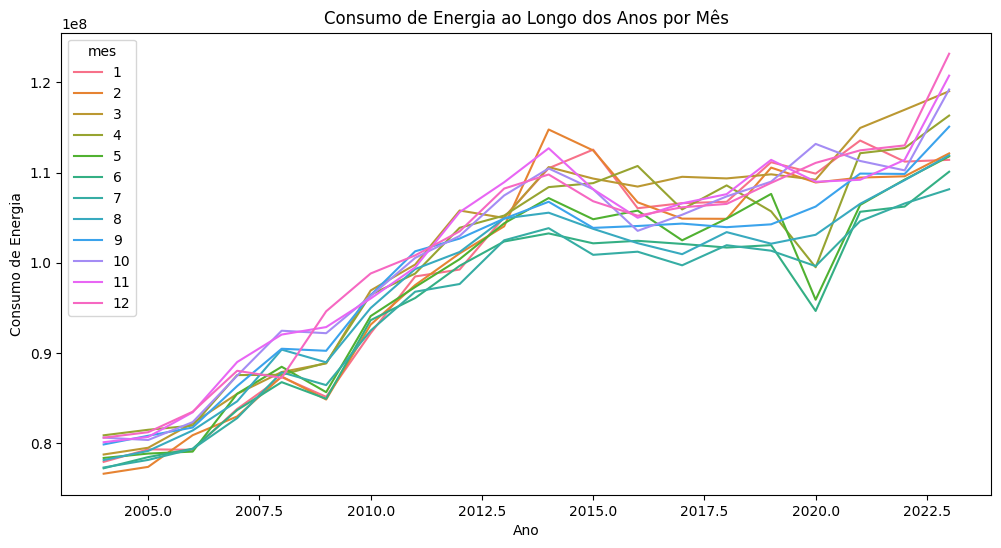

In [ ]:
grupo4 = cons_est.groupby(['ano','mes'])['consumo'].sum().reset_index()
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", n_colors=12)
sns.lineplot(x='ano', y='consumo', data=grupo4, hue='mes',palette=palette)
plt.title('Consumo de Energia ao Longo dos Anos por Mês')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia')
plt.show()


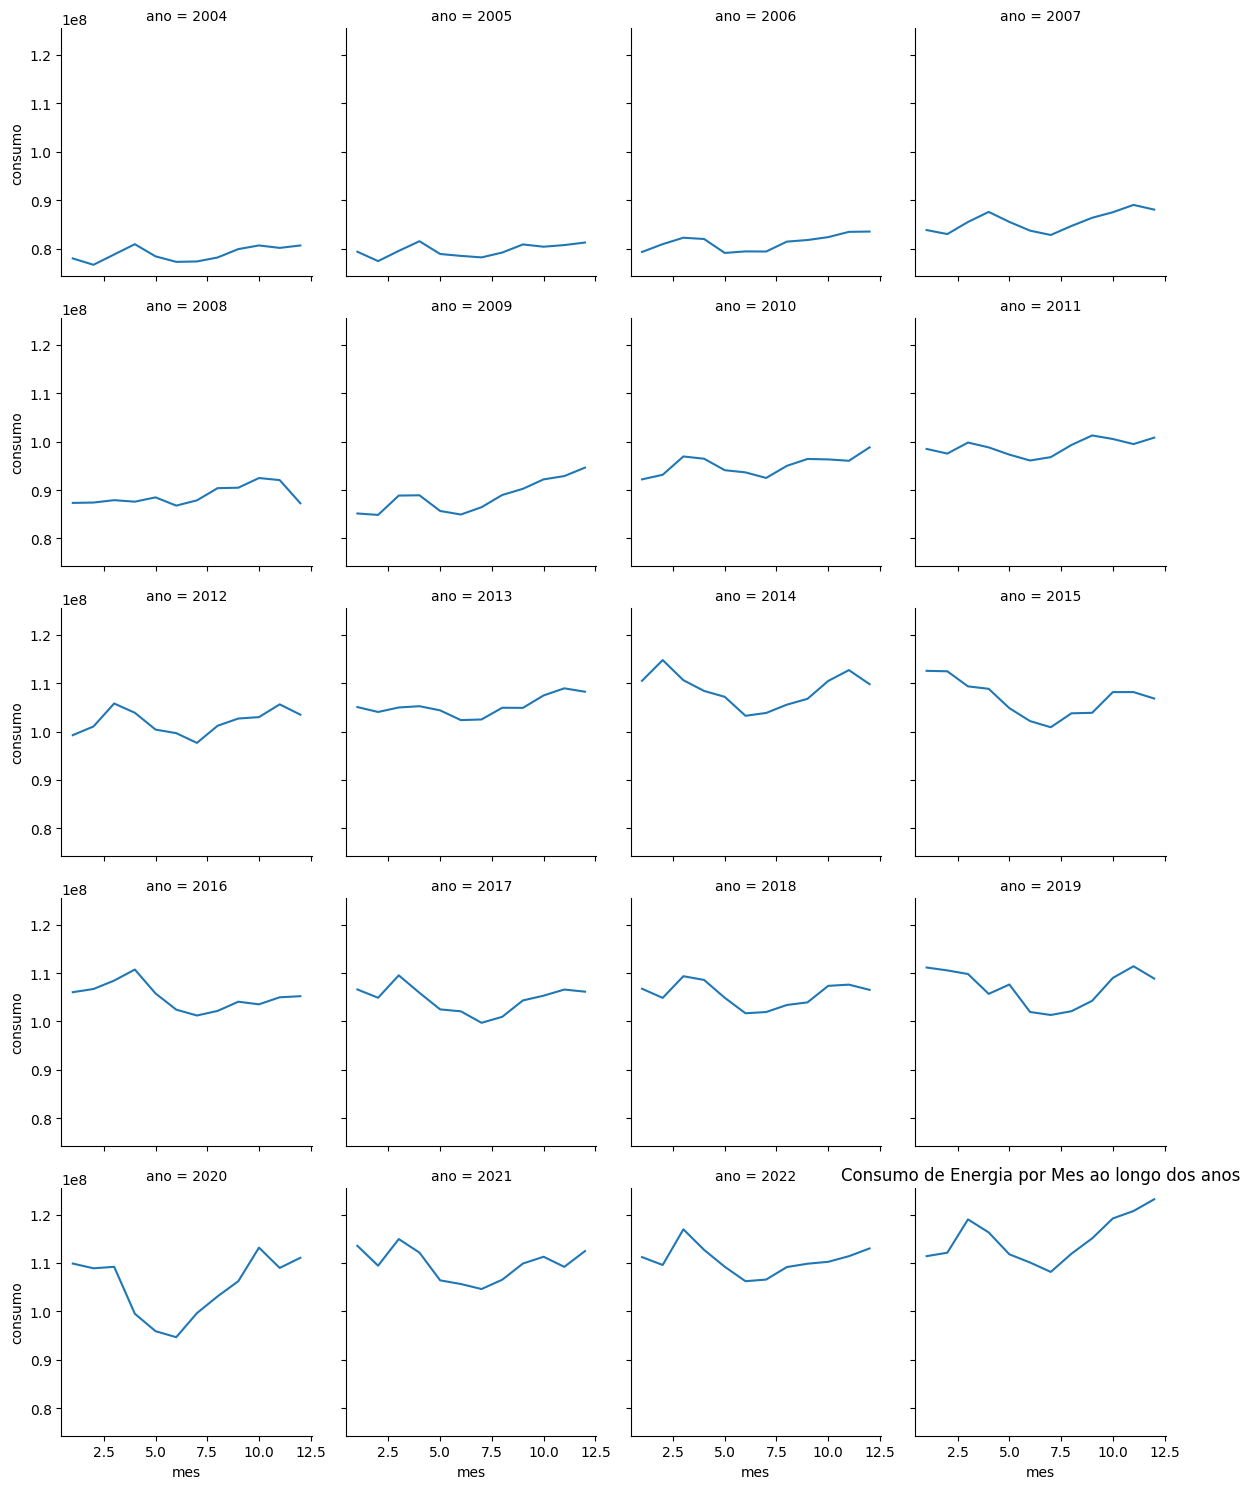

In [ ]:
grupo4 = cons_est.groupby(['ano','mes'])['consumo'].sum().reset_index()
g = sns.FacetGrid(grupo4, col='ano', col_wrap=4)
plt.title('Consumo de Energia por Mes ao longo dos anos')
plt.xlabel('mes')
plt.ylabel('Consumo de Energia')
g.map(sns.lineplot, 'mes', 'consumo')

plt.show()


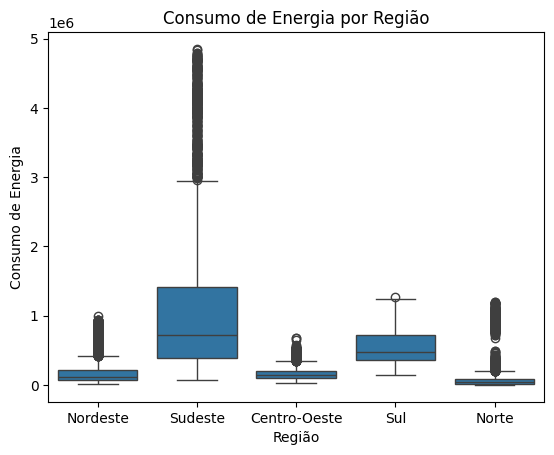

In [ ]:
sns.boxplot(x='regiao', y='consumo', data=cons_est)
plt.title('Consumo de Energia por Região')
plt.xlabel('Região')
plt.ylabel('Consumo de Energia')
plt.show()

In [ ]:
def caixa_consumo(DataFrame):
  regiao = DataFrame.iloc[0,9]
  plt.figure(figsize=(12, 6))
  sns.boxplot(x='estado', y='consumo', data=DataFrame)
  plt.title(f'Consumo de Energia por estado({regiao})')
  plt.xlabel('estado')
  plt.ylabel('Consumo de Energia')
  plt.show()

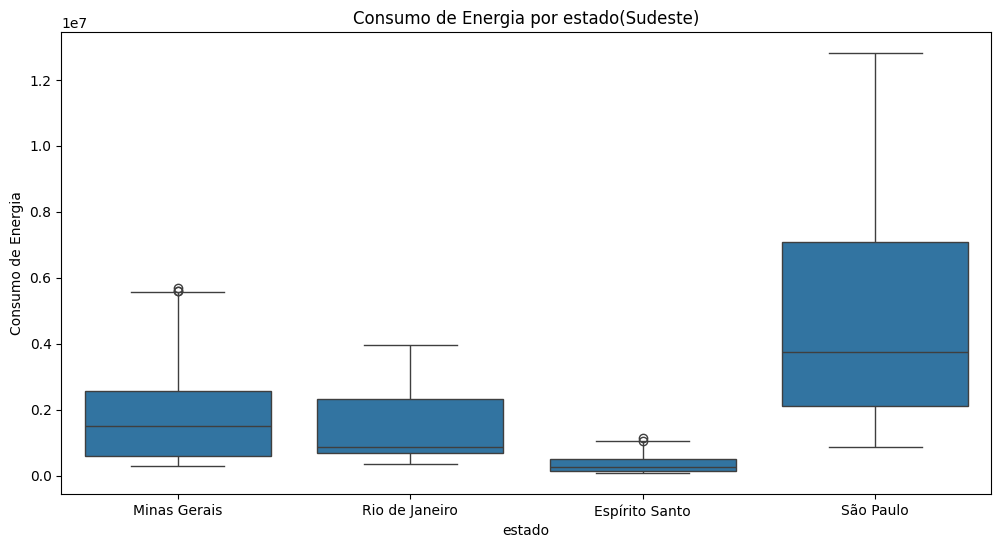

In [ ]:
caixa_consumo(sudeste)

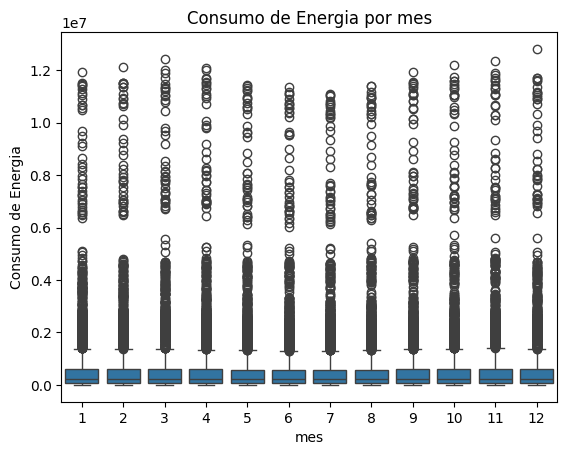

In [ ]:
sns.boxplot(x='mes', y='consumo', data=cons_est)
plt.title('Consumo de Energia por mes')
plt.xlabel('mes')
plt.ylabel('Consumo de Energia')
plt.show()